In [137]:
# import data
import pandas as pd
df = pd.read_csv('diamonds.csv') 
df = df.rename(columns={"Unnamed: 0": "id"})
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


# Initial Data Analysis



In [138]:
# Preprocess Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# ordinal encode cut
cutOrder = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
cutEnc = OrdinalEncoder(categories=[cutOrder])
encoder_df = pd.DataFrame(cutEnc.fit_transform(df[['cut']]))
df['cut'] = encoder_df

# ordinal encoder color
# "The scale begins with the letter D, representing colorless, and continues with increasing presence of color to the letter Z, or light yellow or brown." - google
# https://www.gia.edu/gia-about/4cs-color#:~:text=GIA's%20color%2Dgrading%20scale%20for,defined%20range%20of%20color%20appearance.
# because that's a spectrum, ordinal encode
colorOrder = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
colEnc = OrdinalEncoder(categories=[colorOrder])
encoder_df = pd.DataFrame(colEnc.fit_transform(df[['color']]))
df['color'] = encoder_df

# ordinal encode clarity
clarityOrder = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
claEnc = OrdinalEncoder(categories=[clarityOrder])
encoder_df = pd.DataFrame(claEnc.fit_transform(df[['clarity']]))
df['clarity'] = encoder_df

# scale
toScale = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
scalers = []
for label in toScale:
    scaler = StandardScaler()
    df[label] = scaler.fit_transform(df[[label]])
    scalers.append(scalers)

display(df)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,-1.198168,0.0,1.0,2.0,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,-0.904095
1,2,-1.240361,1.0,1.0,1.0,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,-0.904095
2,3,-1.198168,3.0,1.0,3.0,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,-0.903844
3,4,-1.071587,1.0,5.0,4.0,0.454133,0.242928,-1.364971,-1.317305,-1.287720,-0.902090
4,5,-1.029394,3.0,6.0,2.0,1.082358,0.242928,-1.240167,-1.212238,-1.117674,-0.901839
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,-0.164427,0.0,0.0,1.0,-0.662711,-0.204605,0.016798,0.022304,-0.054888,-0.294731
53936,53937,-0.164427,3.0,0.0,1.0,0.942753,-1.099672,-0.036690,0.013548,0.100988,-0.294731
53937,53938,-0.206621,2.0,0.0,1.0,0.733344,1.137995,-0.063434,-0.047741,0.030135,-0.294731
53938,53939,0.130927,1.0,4.0,2.0,-0.523105,0.242928,0.373383,0.337506,0.285204,-0.294731


# Exploratory Data Analysis


The correlation of data with price shows to be strongest among carat and the size, which is reasonable and to be expected; a larger, better quality diamond will be more expensive than a small, bad quality one. The ID can be ignored.

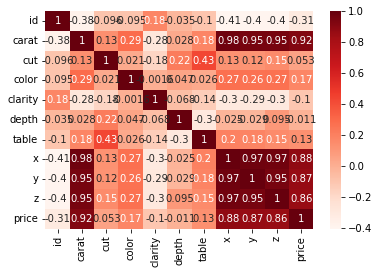

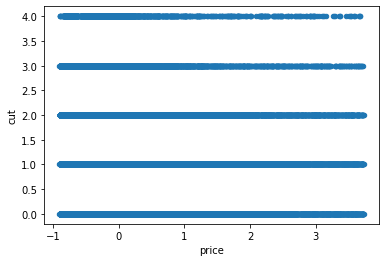

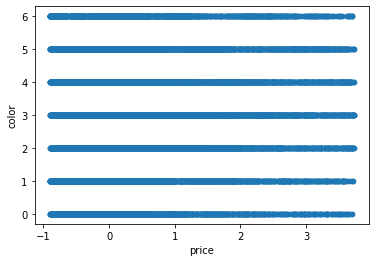

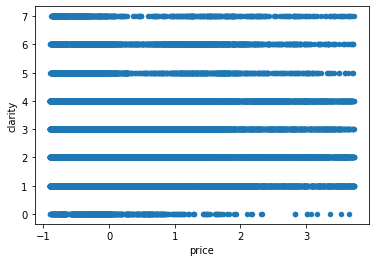

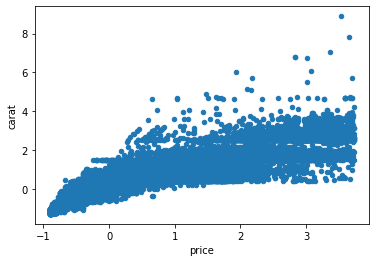

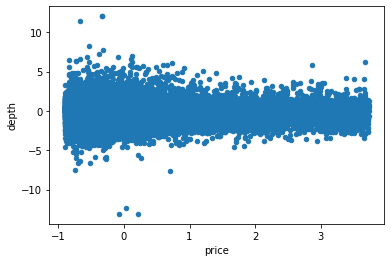

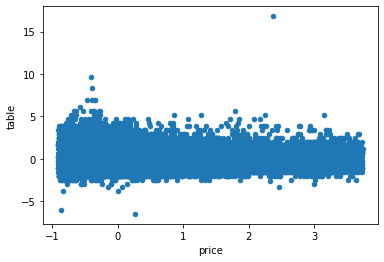

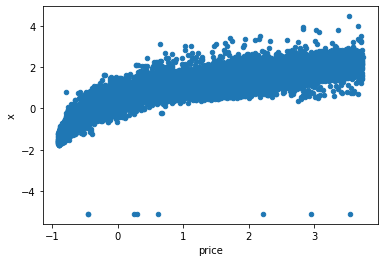

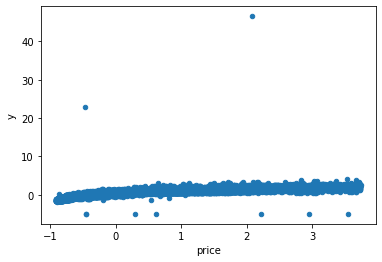

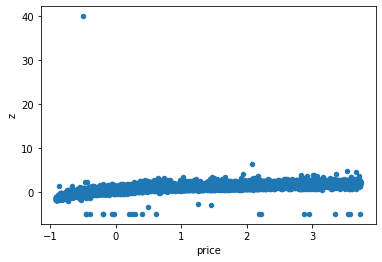

In [139]:
# data analysis

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

for label in ['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'x', 'y', 'z']: 
    df.plot.scatter(x = 'price', y =  label);

In [140]:
# Build classification (or regression) models using the training data
from sklearn.model_selection import train_test_split
seed = 309

y = df['price']
x = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

# You should use the following 10 regression algorithms implemented in scikit-learn to perform regression. These 10
# algorithms are very popular regression methods: (1) linear regression, (2) k-neighbors regression, (3) Ridge regression,
# (4) decision tree regression, (5) random forest regression, (6) gradient Boosting regression, (7) SGD regression, (8)
# support vector regression (SVR), (9) linear SVR, and (10) multi-layer perceptron regression. You are encouraged to
# read the documentation (and provided references if you would like to know more details) about these methods from
# scikit-learn, e.g. linear regression is implemented in sklearn.linear model.LinearRegression.

from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

import time


models = [LinearRegression(),  KNeighborsRegressor(), Ridge(), DecisionTreeRegressor(), 
          RandomForestRegressor(), GradientBoostingRegressor(), SGDRegressor(),
          SVR(), LinearSVR(), MLPRegressor()]

names = ["Linear Regression", "K Neighbours Regressor", "Ridge Regression", "Decision Tree Regressor", 
        "Random Forest Regressor", "Gradient Boosting Regressor", "SGD Regressor",  "SVR", "SVR Linear", "Multi Layer Perceptron Regressor"]

answers = []
scores = []
timeDelta = []

for i in range (len (models)):
    print(names[i])
    
    time1 = time.time()
    
    model = models[i]
    model.fit(x_train, y_train)
    ans = model.predict(x_test)
    
    time2 = time.time()
    
    timeDelta.append(time2-time1)
    
    answers.append(ans)
    
    sc = model.score(x_test, y_test)
    print("--> Score: ", sc)
    scores.append(sc)

Linear Regression
--> Score:  0.8929578992794374
K Neighbours Regressor
--> Score:  0.9636598963111133
Ridge Regression
--> Score:  0.8929582029892601
Decision Tree Regressor
--> Score:  0.967152110922074
Random Forest Regressor
--> Score:  0.9815680443351709
Gradient Boosting Regressor
--> Score:  0.9723005157718628
SGD Regressor
--> Score:  0.8925858922266892
SVR
--> Score:  0.951740394743948
SVR Linear


D:\Programs\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--> Score:  0.8711847845321514
Multi Layer Perceptron Regressor
--> Score:  0.9747974255687794


In [141]:
# Evaluate models by using cross validation (Optional)

In [142]:
# Assess model on the test data.
# Report the results (keep 2 decimals) of all the 10 regression algorithms on the test data in terms of mean
# squared error (MSE), root mean squared error (RMSE), relative squared error (RSE), mean absolute error
# (MAE), and execution time. You should report them in a table.

def meanSquaredError(myAnswer, trueAnswer): 
    ans = 0.0
    
    for i in range (len (trueAnswer)):
        ans = ans + () (trueAnswer[i] - myAnswer[i])**)
    
    return (ans/len(trueAnswer))

def rootMeanSquaredError(myAnswer, trueAnswer):
    ans = 0.0
    
    for i in range (len (trueAnswer)):
        ans = ans + () (trueAnswer[i] - myAnswer[i])**)
    
    return Math.sqrt(ans/len(trueAnswer))

def relativeSquaredError(myAnswer, trueAnswer):
    return 0.0

def meanAbsoluteError(myAnswer, trueAnswer):
    return 0.0

